**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

NOMBRE: Carlos Eduardo García García
MATRÍCULA: A01795206
NOMBRE: Francisco Marmolejo Martinez
MATRÍCULA: A01794882
NOMBRE: Hugo Jovan Ramirez Ceron
MATRÍCULA: A00994966
Manuel Enrique Rodríguez Rey
MATRÍCULA: A01795392

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
melate_df = pd.read_csv('Revanchita.csv')
melate_df

,NPRODUCTO,CONCURSO,F1,F2,F3,F4,F5,F6,BOLSA,FECHA
0,34,3819,1,8,16,26,35,55,188200000,08/11/2023
1,34,3818,10,24,27,32,34,47,186600000,05/11/2023
2,34,3817,9,11,15,24,26,45,184600000,03/11/2023
3,34,3816,14,44,46,49,53,55,182600000,01/11/2023
4,34,3815,16,19,34,37,44,45,181100000,29/10/2023
...,...,...,...,...,...,...,...,...,...,...
1444,34,2375,3,12,25,30,34,51,12500000,08/09/2010
1445,34,2374,7,14,18,38,43,47,12000000,05/09/2010
1446,34,2373,7,19,29,40,52,55,11500000,01/09/2010
1447,34,2372,1,13,23,31,32,48,11000000,29/08/2010


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [3]:
dfNumericalValues = melate_df.copy().select_dtypes(exclude=['object'])
dfNumericalValues.describe()

,NPRODUCTO,CONCURSO,F1,F2,F3,F4,F5,F6,BOLSA
count,1449.0,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1.449000e+03
mean,34.0,3095.000000,8.291235,15.986197,24.333333,32.609386,41.058661,48.934438,7.561332e+07
std,0.0,418.434583,6.795813,8.503969,9.301651,9.348047,8.495612,6.588160,6.262658e+07
min,34.0,2371.000000,1.000000,2.000000,4.000000,6.000000,11.000000,21.000000,1.000000e+07
25%,34.0,2733.000000,3.000000,9.000000,17.000000,26.000000,35.000000,46.000000,2.400000e+07
50%,34.0,3095.000000,6.000000,15.000000,24.000000,33.000000,42.000000,51.000000,5.800000e+07
75%,34.0,3457.000000,12.000000,22.000000,31.000000,40.000000,48.000000,54.000000,1.080000e+08
max,34.0,3819.000000,37.000000,44.000000,51.000000,53.000000,55.000000,56.000000,2.625000e+08


1b) Búsqueda de valores faltantes.

In [4]:
melate_df.isna().sum()

NPRODUCTO    0
CONCURSO     0
F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
BOLSA        0
FECHA        0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

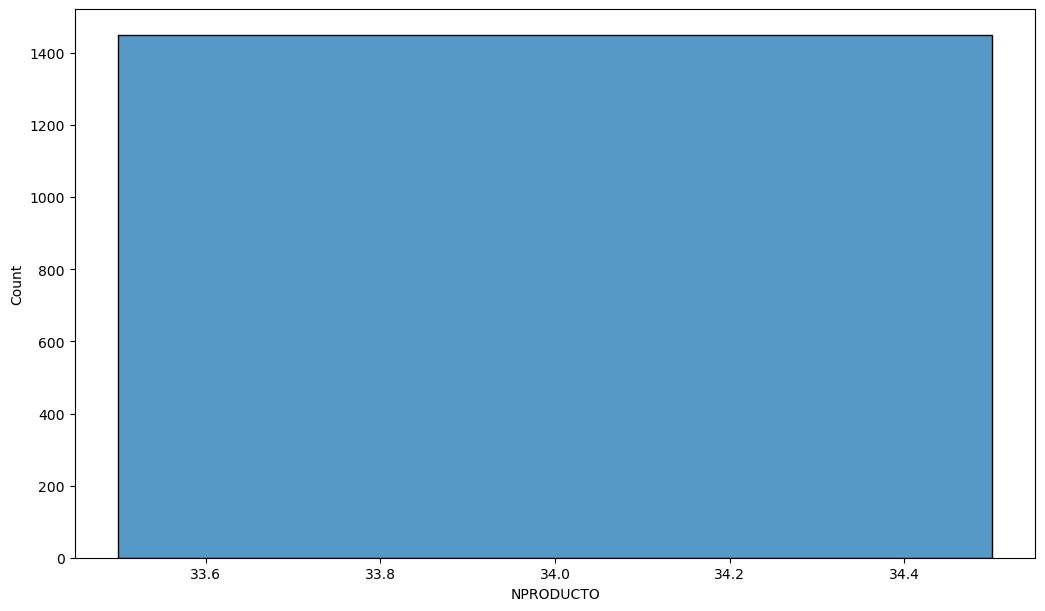

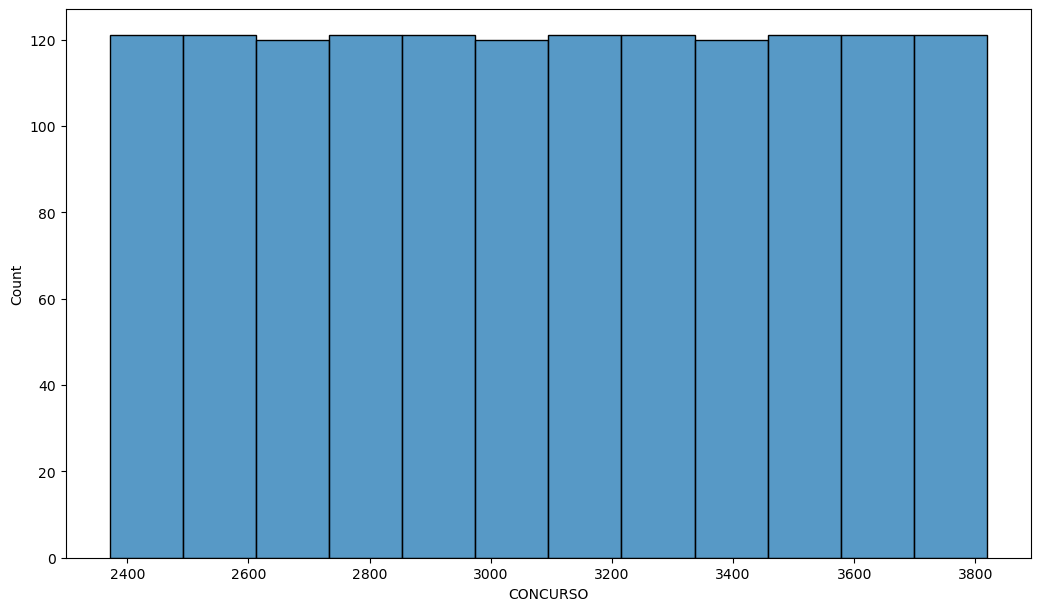

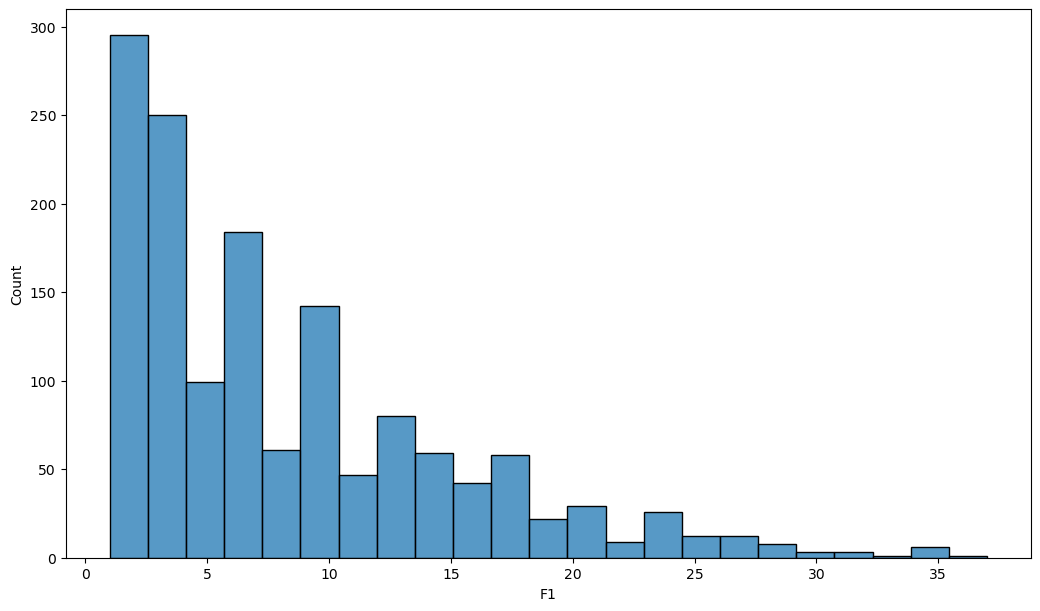

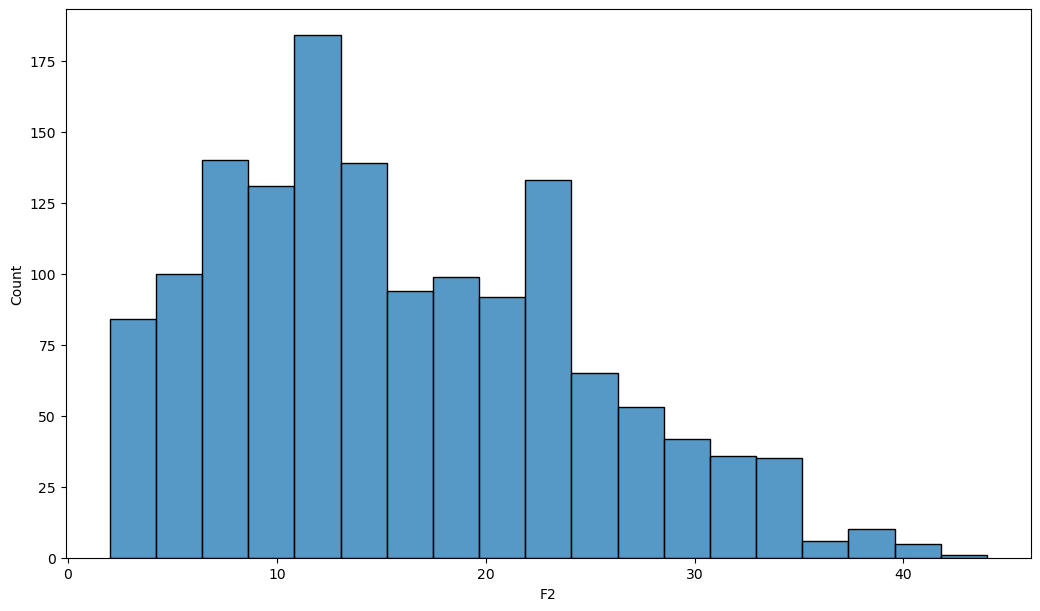

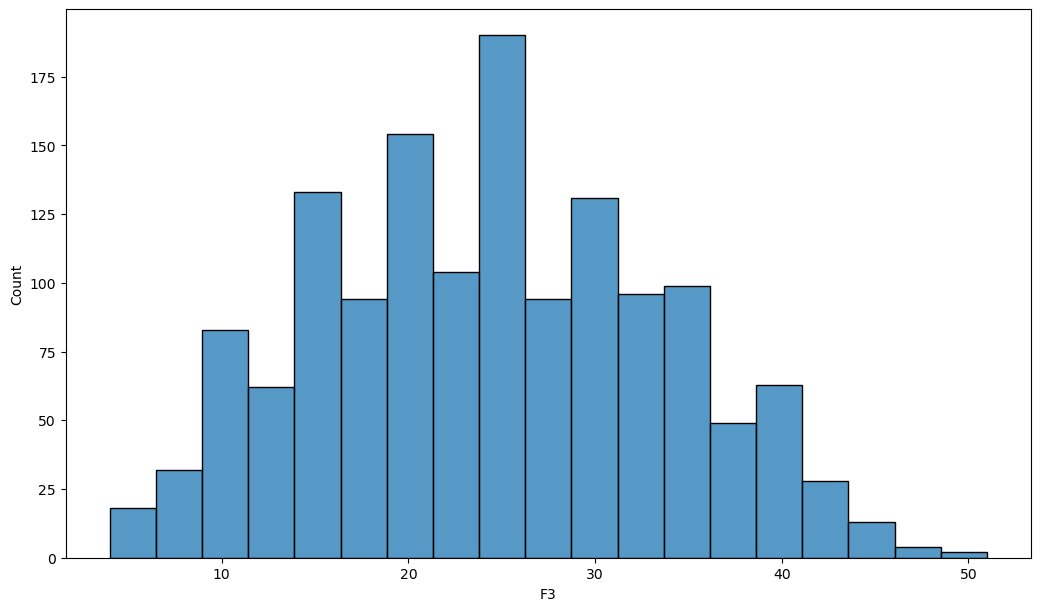

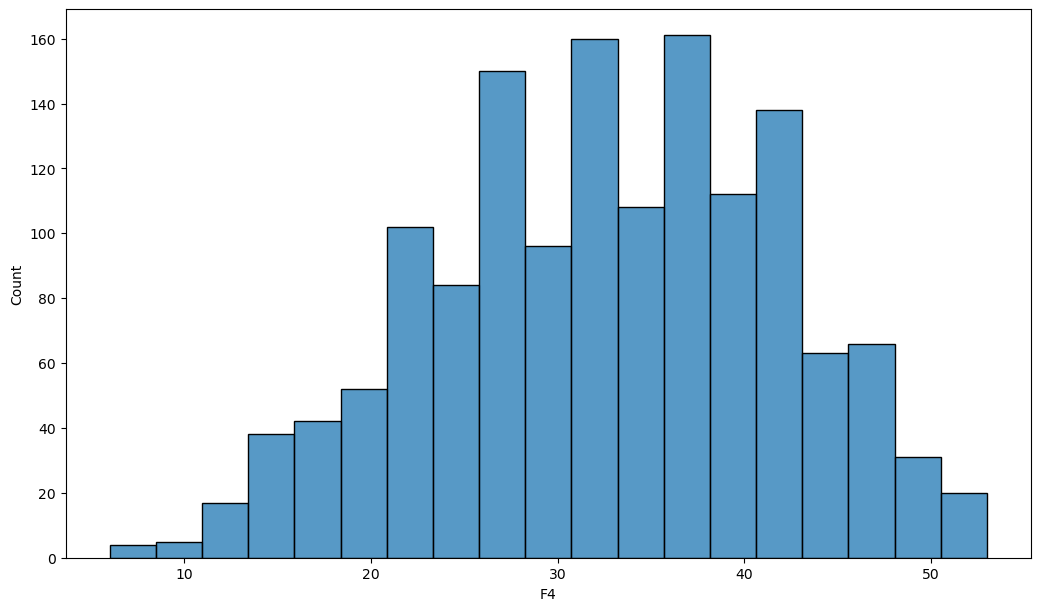

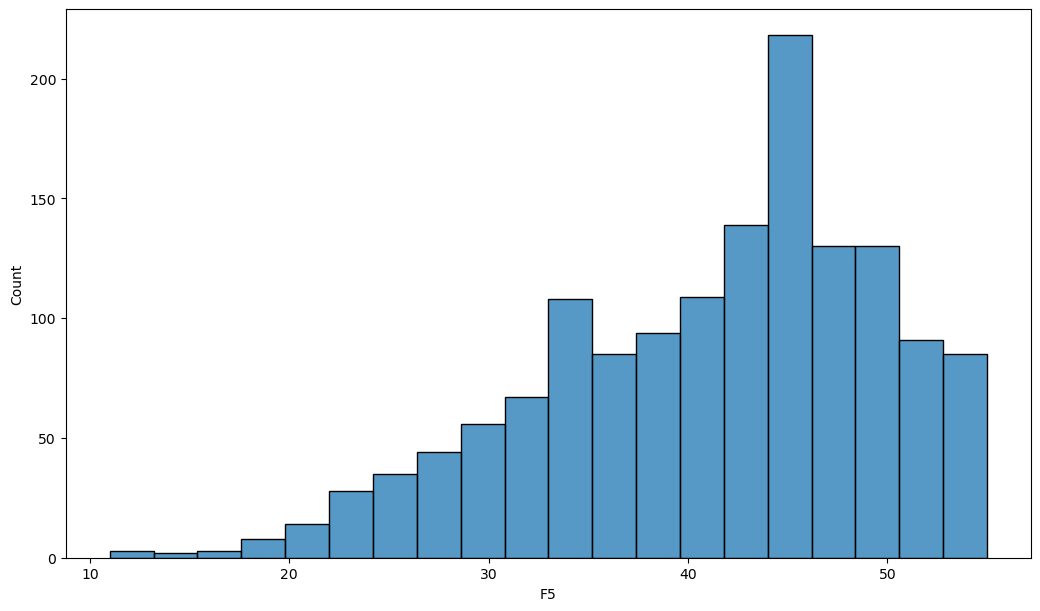

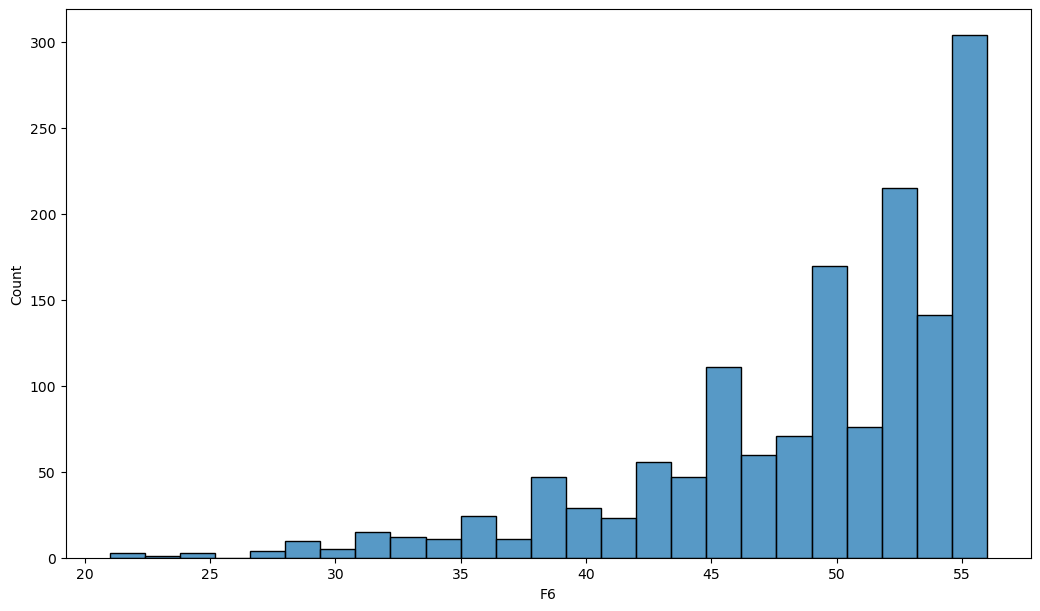

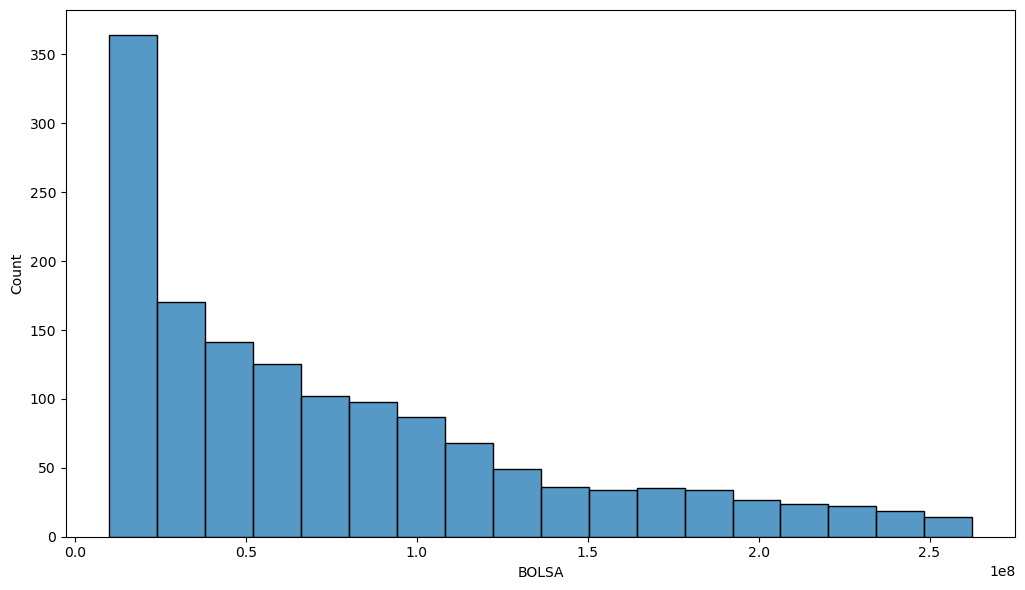

In [5]:
for column in dfNumericalValues.columns:
    plt.figure(figsize=(20, 6), constrained_layout=True)
    ax = plt.subplot(1, 2, 1)
    sns.histplot(dfNumericalValues, x=column, ax=ax)
    #ax = plt.subplot(1, 2, 2)
    #sns.boxplot(dfNumericalValues, x=column, ax=ax)

plt.tight_layout()
plt.show()

KeyError: 'R1'

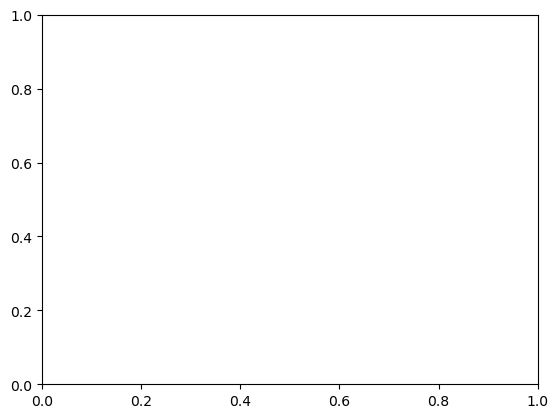

In [6]:
melate_df.plot.scatter(x='CONCURSO', y='R1', s=None, c=None)

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?


**Respuesta:** Si, hay una clara distinción en la prima de los seguros entre una persona fumadora y no, siendo los fumadores cobrados una mayor prima de seguro.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

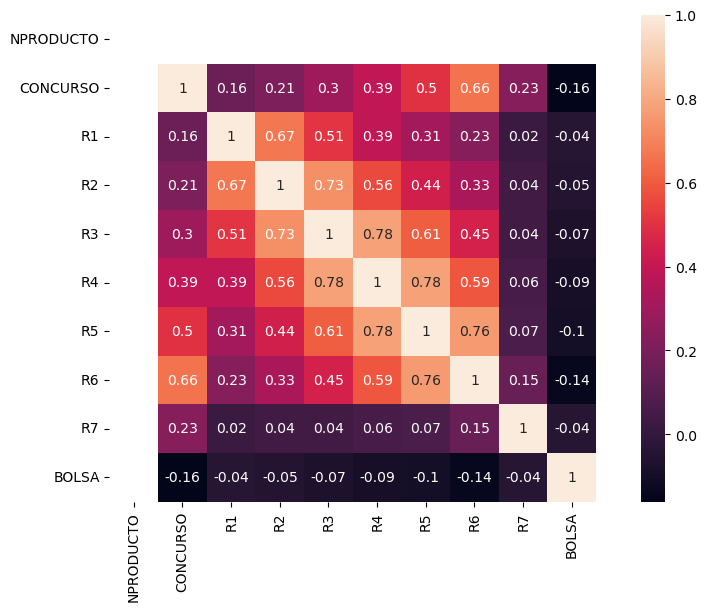

In [ ]:
plt.figure(figsize=(10, 6), constrained_layout=True)

correlation = dfNumericalValues.corr(method='pearson', numeric_only=True)
sns.heatmap(round(correlation, 2), annot = True, square=True)

plt.show()

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
y = melate_df['CONCURSO'].copy()
melate_df = melate_df.drop('NPRODUCTO', axis=1)
melate_df = melate_df.drop('CONCURSO', axis=1)
melate_df = melate_df.drop('BOLSA', axis=1)
x = melate_df.drop('FECHA', axis=1)

x


,R1,R2,R3,R4,R5,R6,R7
0,9,11,20,30,36,55,10
1,2,6,8,29,38,50,1
2,20,21,33,35,39,50,28
3,3,4,15,24,42,56,17
4,7,13,18,34,40,50,46
...,...,...,...,...,...,...,...
3814,4,10,13,18,33,39,11
3815,8,12,15,18,20,34,37
3816,16,18,19,21,29,32,27
3817,5,6,24,30,34,38,32


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


numericAttributes = ['R1']
categoricalAttributes = ['CONCURSO']

###############################################

pipelineNumeric = make_pipeline(preprocessing.MinMaxScaler())

###############################################

pipelineCategorical = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

################################################################

preprocessing = make_column_transformer(
    (pipelineNumeric, make_column_selector(dtype_include=np.number)),
    (pipelineCategorical, make_column_selector(dtype_include=object)),
)

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
from sklearn.linear_model import LinearRegression

#X_train = preprocessing.fit_transform(X_train)

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_train)
lr_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred




array([1100., 1300.,  900., 3100., 2600.])

In [ ]:
y_train[:5]

2313    1506
3690     129
2225    1594
180     3639
823     2996
Name: CONCURSO, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error

lr_rmse = mean_squared_error(y_train, lr_predictions, squared=False)
lr_rmse

813.1639198859533

In [ ]:
from sklearn.metrics import r2_score

lr_Score = r2_score(y_train, lr_predictions)
lr_Score

0.4534014847671105

**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

###############################################

pipelineNumeric2 = make_pipeline(StandardScaler())

###############################################

pipelineCategorical2 = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

################################################################

preprocessing2 = make_column_transformer(
    (pipelineNumeric2, make_column_selector(dtype_include=np.number)),
    (pipelineCategorical2, make_column_selector(dtype_include=object)),
)

lr_model3 = make_pipeline(preprocessing, LinearRegression())
lr_model3.fit(X_train, y_train)

lr_predictions3 = lr_model.predict(X_train)

lr_predictions3

array([1142.59647445, 1299.58264566,  924.33279078, ..., 2220.62517676,
       3216.83629921, 2855.87885031])

In [ ]:
mean_squared_error(y_train, lr_predictions3, squared=False)

813.1639198859533

In [ ]:
r2_score(y_train, lr_predictions3)

0.4534014847671105

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

def findBestDegree(preprocessor: ColumnTransformer):
    rmses = []
    degrees = np.arange(1, 10)
    min_rmse, min_deg = 1e10, 0

    for deg in degrees:

        poly_reg_model = make_pipeline(preprocessor, PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
        poly_reg_model.fit(X_train, y_train)
        poly_reg_y_predicted = poly_reg_model.predict(X_test)

        poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
        rmses.append(poly_reg_rmse)

        # Cross-validation of degree
        if min_rmse > poly_reg_rmse:
            min_rmse = poly_reg_rmse
            min_deg = deg

    # Plot and present results
    print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

    plt.plot(degrees, rmses)
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('RMSE')

    return (min_deg, min_rmse)



Best degree 3 with RMSE 759.9701429633819


(3, 759.9701429633819)

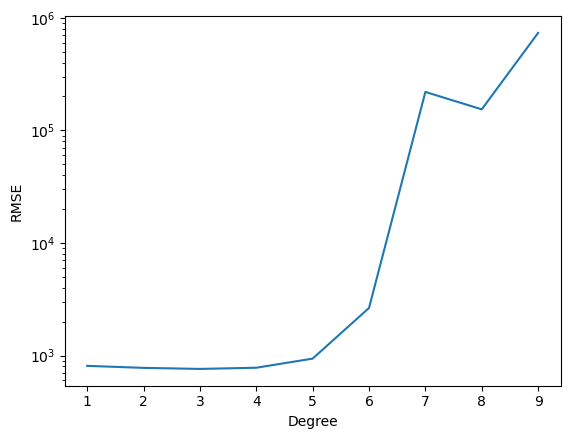

In [ ]:
findBestDegree(preprocessing2)

In [ ]:
from sklearn.metrics import r2_score
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
lr_model4.fit(X_train, y_train)
lr_predictions4 = lr_model4.predict(X_test)

np.sqrt(mean_squared_error(y_test, lr_predictions4))
print('The Root Mean Square Error (RMSE) is:', mean_squared_error(y_test, lr_predictions4))
print('The R square (R2) is:', r2_score(y_test, lr_predictions4))

The Root Mean Square Error (RMSE) is: 602839.5782218255
The R square (R2) is: 0.5127504926472779
